<a href="https://colab.research.google.com/github/latecomer04/dl_codes/blob/main/3rd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''Build the Image classification model by dividing the model into following 4 stages:
 a. Loading and pre-processing the image data
 b. Defining the model’s architecture
 c. Training the model
 d. Estimating the model’s performance'''

'Build the Image classification model by dividing the model into following 4 stages:\n a. Loading and pre-processing the image data\n b. Defining the model’s architecture\n c. Training the model\n d. Estimating the model’s performance'

In [1]:
#import the required libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 1->  load and pre-process the data

mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
input_shape=(28,28,1)
#print(x_train.shape)

x_train=x_train.reshape(x_train.shape[0],28,28,1);
x_test=x_test.reshape(x_test.shape[0],28,28,1)
#print(x_train.shape)

x_train=(x_train-0.0)/(255.0-0.0)
x_test=(x_test-0.0)/(255-0.0)

#print(x_train[0].max())
#print(x_test[0].min())

#print(x_train.shape)
#print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#- Defining the model’s architecture

#model=Sequential()
#model.add(Conv2D(28,kernel_size=(3,3),input_shape=(28,28,1)))
#model.add(MaxPooling2D(pool_size=2))
#model.add(Flatten())
#model.add(Dense(200,activation="relu"))
#model.add(Dropout(.3))
#model.add(Dense(10,activation="softmax"));

model=keras.Sequential([
    keras.layers.Conv2D(28,kernel_size=(3,3),input_shape=(28,28,1)),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10,activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [4]:
# 3- training the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

history=model.fit(x_train,y_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 37s 19ms/step - loss: 0.2406 - accuracy: 0.9276
Epoch 2/2
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1011 - accuracy: 0.9689


In [5]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

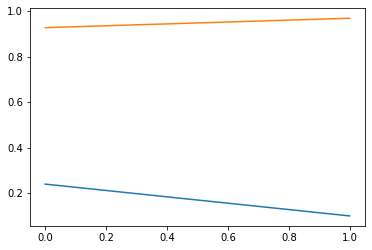

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

313/313 [==============================] - 2s 7ms/step - loss: 0.0673 - accuracy: 0.9786
test_loss  0.06734150648117065
Test_acc  0.978600025177002


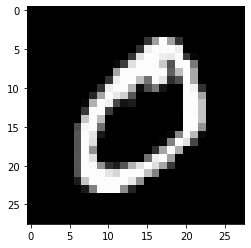

1/1 [==============================] - 0s 19ms/step


0

In [ ]:
# 4 -estimating the model
test_loss,test_acc=model.evaluate(x_test,y_test)
print("test_loss ",test_loss);
print("Test_acc ",test_acc)


image=x_train[1]
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
predict_model=model.predict([image])
np.argmax(predict_model)